## STUDENT PERFORMANCE INDICATOR
---

### Life cycle of a machine learning project
- Understanding the problem statement
- Data collection
- Data checks to perform
- Exploratory data analysis
- Data preprocessing
- Model training
- Choose best model

#### 1) PROBLEM STATEMENT
The project understand how the student's performance(test score) is affected by other variable such gender ,ethinicity,parental level of education,Lunch and test preparation course.

#### 2) DATA COLLECTION

- Data source-https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
- The data consists of 8 columns and 1000 rows.

##### 2.1 Importing data and required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from warnings import filterwarnings
filterwarnings('ignore')

##### Importing the dataset

In [41]:
df=pd.read_csv('data/stud.csv')

##### Show top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

##### Shape of the dataset

`shape of the dataset is 1000 rows and 8 columns`

##### 2.2 Dataset information

- gender-> Sex of student: Male or Female                                        
- race/ethnicity-> Ethnicity of students (group A,B,C,D)                                
- Parental level of education-> parent's final education                     
- Lunch: Having lunch before test(standard or free/reduced)
- test preparation course->complete or not complete before test
- math score
- reading score
- writing score

### 3 Data checks to perform

- Check missing value
- Check duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of the dataset
- Check different categories present in the different categorical column

##### 3.1 Check missing values

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

`No missing value in the dataset`

#### 3.2 Check duplicates

In [7]:
df.duplicated().sum()

0

`No duplicate value present`

##### 3.3 Check the datatype


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Data statistics

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### `INSIGHTS`
- The mean score of math,reading and writing are almost same. Ie, around 66-69.
- The standard deviation also lies close to each other around 14.6-15.9
- The minimum score for math is 0 while it is higher for writing while much higher for reading.

### 3.5 CATEGORIES IN CATEGORICAL VARIABLE

In [42]:
obj_cols=[i for i in df.columns.values if df[i].dtype=='O']

In [43]:
for i in obj_cols:
    unique_list=list(df[i].unique())
    print(f'The unique categories in {i} are:', end=" ")
    print(unique_list)

The unique categories in gender are: ['female', 'male']
The unique categories in race_ethnicity are: ['group B', 'group C', 'group A', 'group D', 'group E']
The unique categories in parental_level_of_education are: ["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school']
The unique categories in lunch are: ['standard', 'free/reduced']
The unique categories in test_preparation_course are: ['none', 'completed']


### 3.6 NUMBER OF NUMERICAL AND CATEGORICAL FEATURE

In [121]:
num_features=[i for i in df.columns.values if df[i].dtype!='O']
cat_features=[i for i in df.columns.values if df[i].dtype=='O']

print(f'There are {len(num_features)} numerical features : {list(num_features)}')
print(f'There are {len(cat_features)} categorical features : {list(cat_features)}')

There are 5 numerical features : ['math_score', 'reading_score', 'writing_score', 'total_score', 'average_score']
There are 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.7 ADDING COLUMNS FOR TOTAL SCORE AND AVERAGE SCORES

In [45]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=(df['math_score']+df['reading_score']+df['writing_score'])/3

In [46]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### 3.8 EXPLORATION CONTD..

- Students with full marks in each subject

In [15]:
for i in num_features:
    student_num=df[df[i]==100][i].count()
    print(f'The number of students who get full marks in {i} are {student_num}')

The number of students who get full marks in math_score are 7
The number of students who get full marks in reading_score are 17
The number of students who get full marks in writing_score are 14


- Students with less than 20 marks in each subjects.

In [16]:
for i in num_features:
    student_num=df[df[i]<=20][i].count()
    print(f'The number of students who get full marks in {i} are {student_num}')

The number of students who get full marks in math_score are 4
The number of students who get full marks in reading_score are 1
The number of students who get full marks in writing_score are 3


### `INSIGHT`

- More students performed worst in maths while students performed best in reading subject.

## 4.0 VISUALIZATION

<Figure size 1000x1500 with 0 Axes>

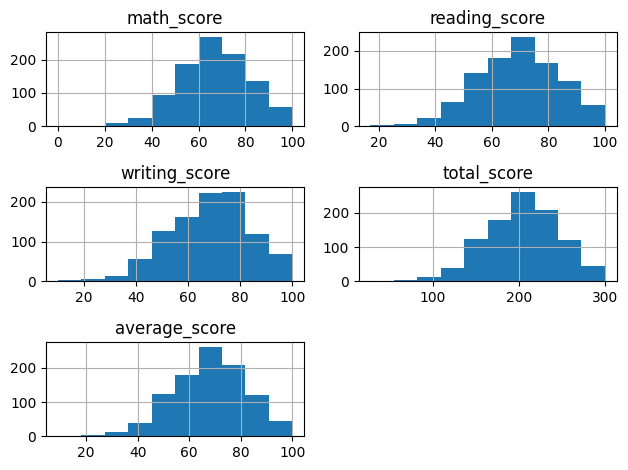

In [17]:
plt.figure(figsize=(10,15))
df.hist()
plt.tight_layout()
plt.show()

### 4.1 HISTROGRAM AND KDE

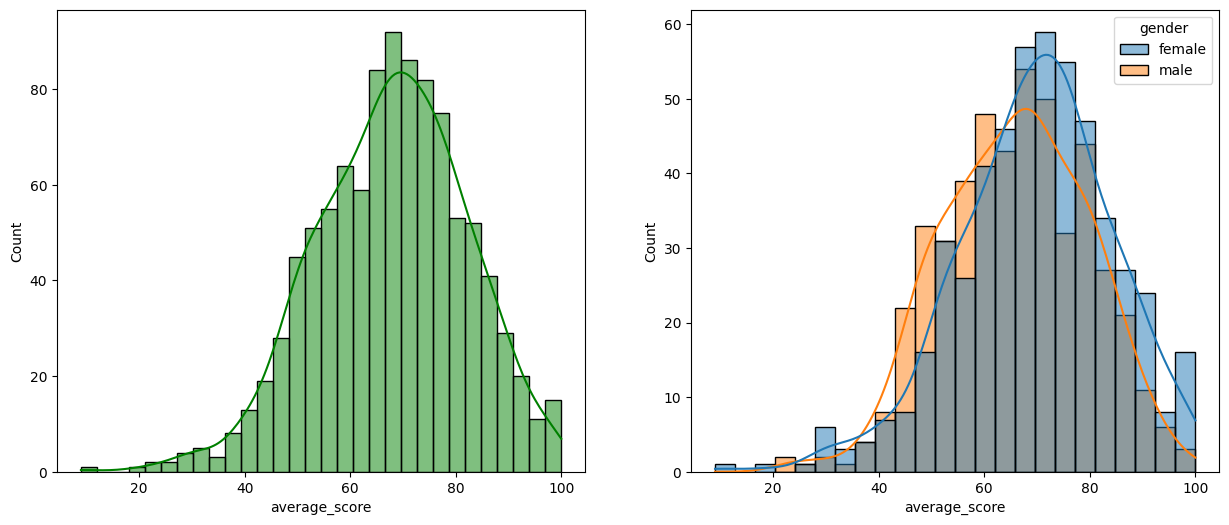

In [18]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

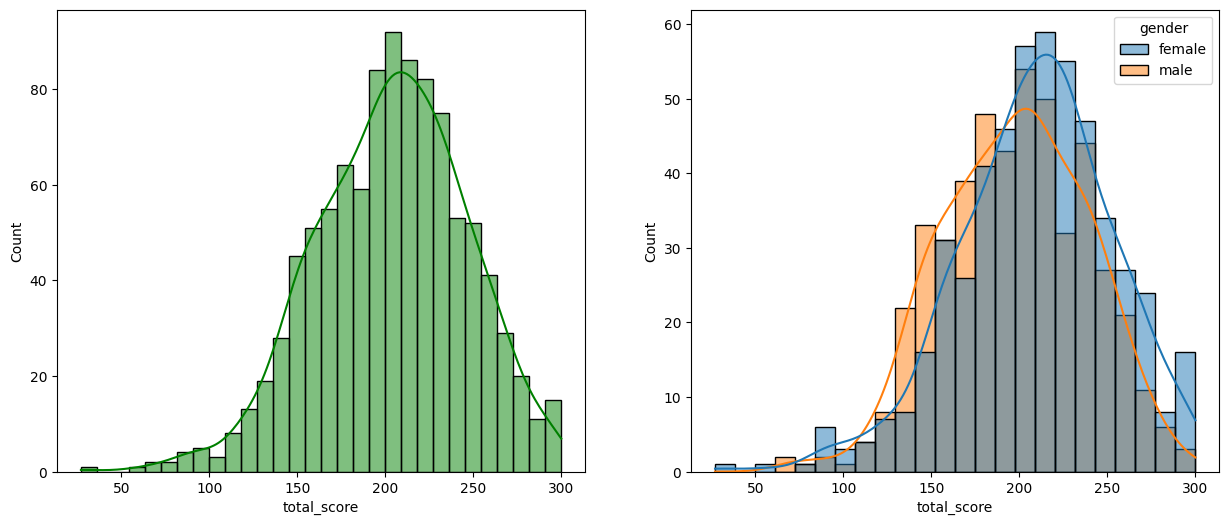

In [19]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

#### `INSIGHTS`
- Female students tends to perform well in exam.
- Average and total score are both better for female candidates.

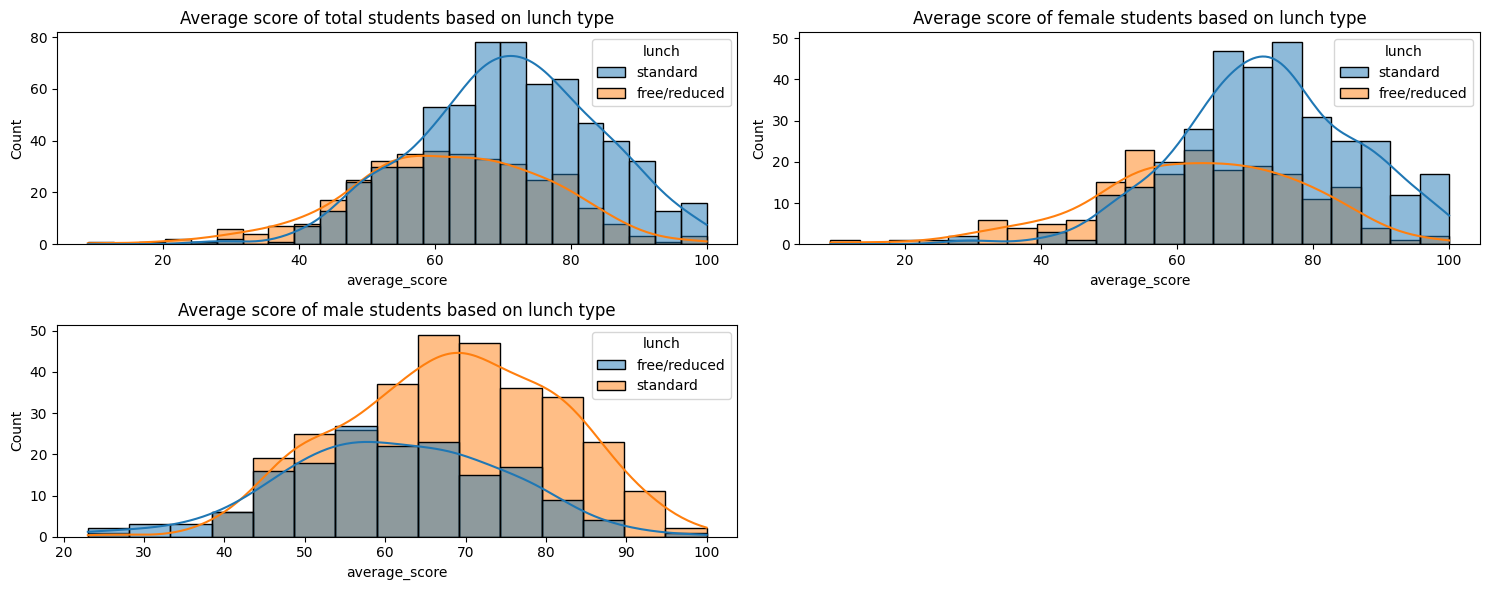

In [20]:
plt.figure(figsize=(15,6))
plt.subplot(221)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.title('Average score of total students based on lunch type')
plt.subplot(222)
sns.histplot(data=df[df['gender']=='female'],x='average_score',kde=True,hue='lunch')
plt.title('Average score of female students based on lunch type')
plt.subplot(223)
sns.histplot(data=df[df['gender']=='male'],x='average_score',kde=True,hue='lunch')
plt.title('Average score of male students based on lunch type')
plt.tight_layout()
plt.show()

#### `INSIGHTS`

Average score of students who took standard lunch scored higher compared to students who took free/reduced lunch

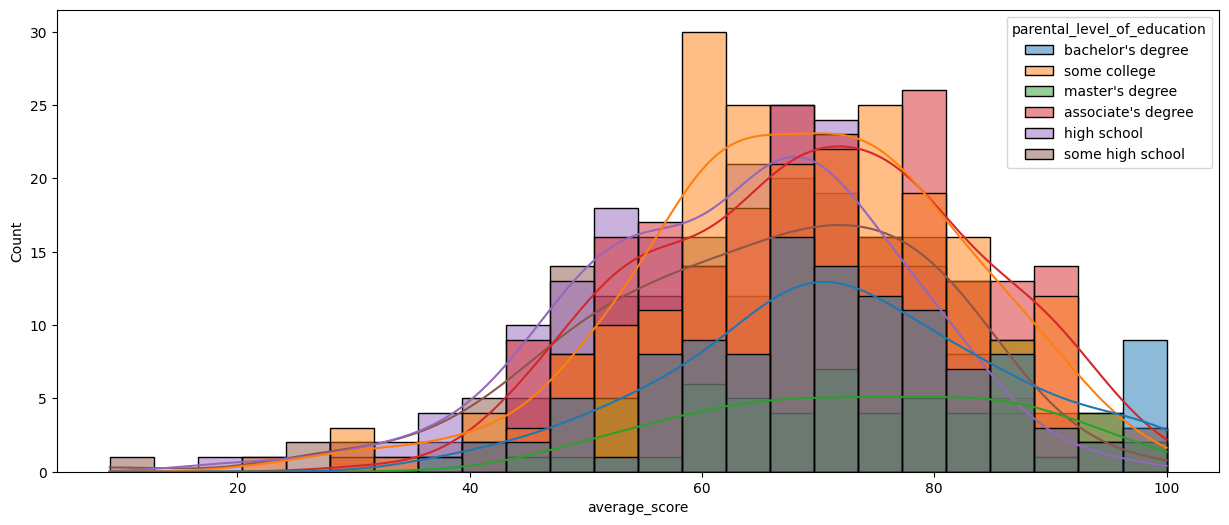

In [21]:
plt.figure(figsize=(15,6))
sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

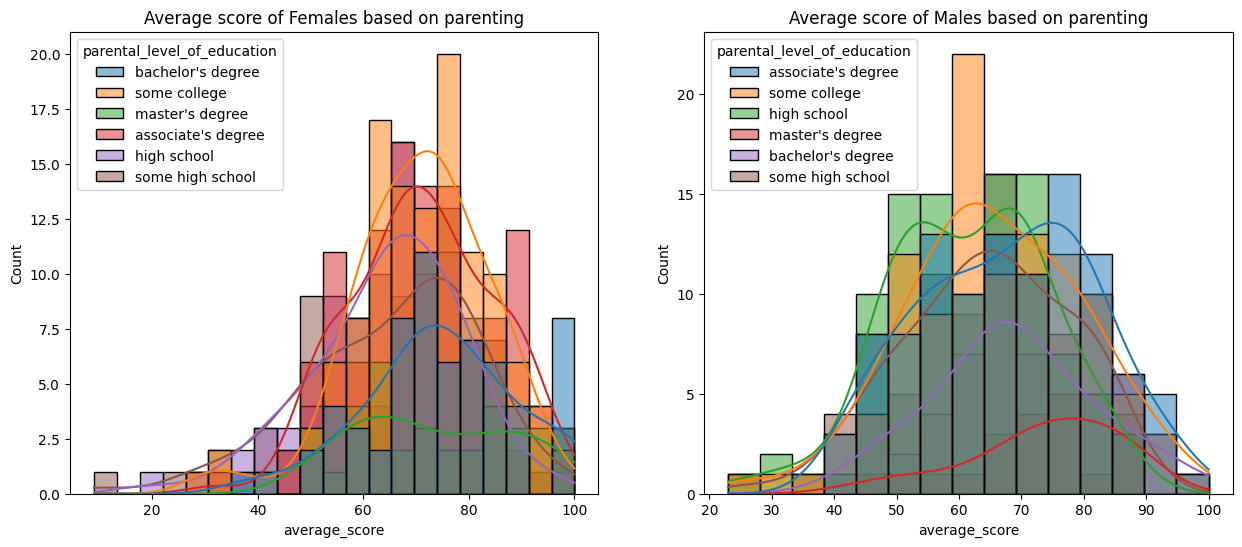

In [22]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.histplot(data=df[df['gender']=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.title('Average score of Females based on parenting')
plt.subplot(122)
sns.histplot(data=df[df['gender']=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.title('Average score of Males based on parenting')
plt.show()

#### `INSIGHTS`
- For female students the average score is almost independt of parental level of eductaion.
- For males parents having master degree or associate degree have a slightly higher chances of scoring better.

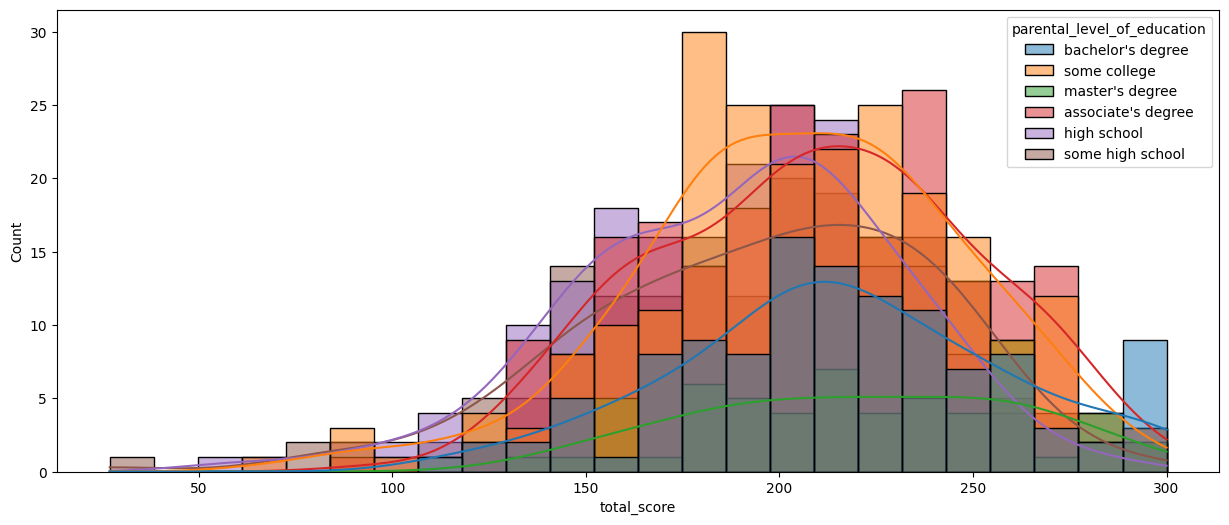

In [23]:
plt.figure(figsize=(15,6))
sns.histplot(data=df,x='total_score',kde=True,hue='parental_level_of_education')
plt.show()

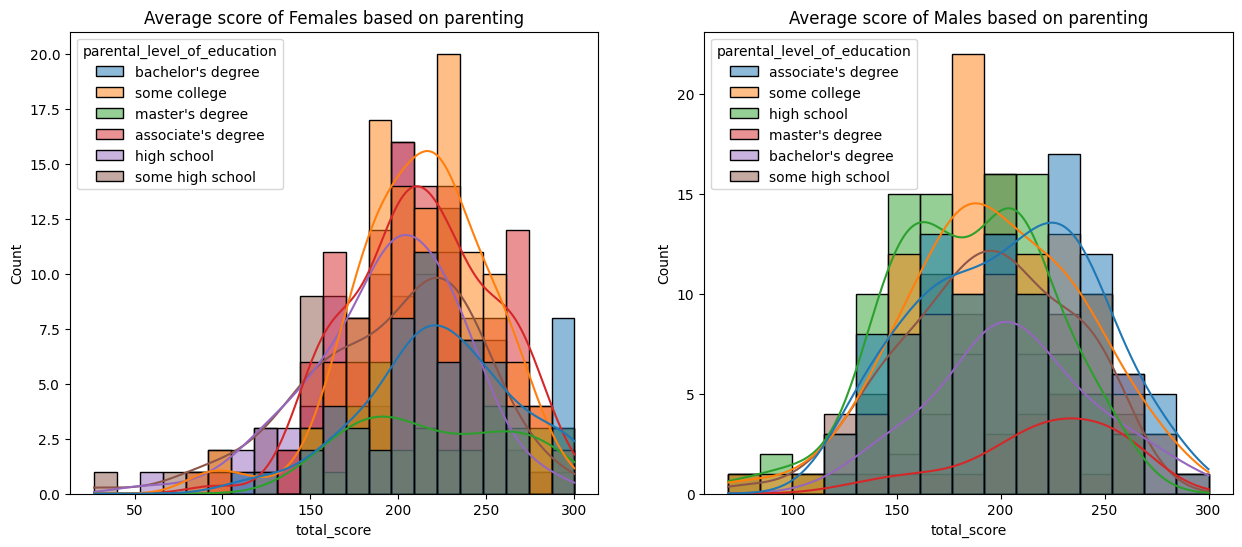

In [24]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.histplot(data=df[df['gender']=='female'],x='total_score',kde=True,hue='parental_level_of_education')
plt.title('Average score of Females based on parenting')
plt.subplot(122)
sns.histplot(data=df[df['gender']=='male'],x='total_score',kde=True,hue='parental_level_of_education')
plt.title('Average score of Males based on parenting')
plt.show()

#### `INSIGHTS`
- The same pattern is visible in total score also

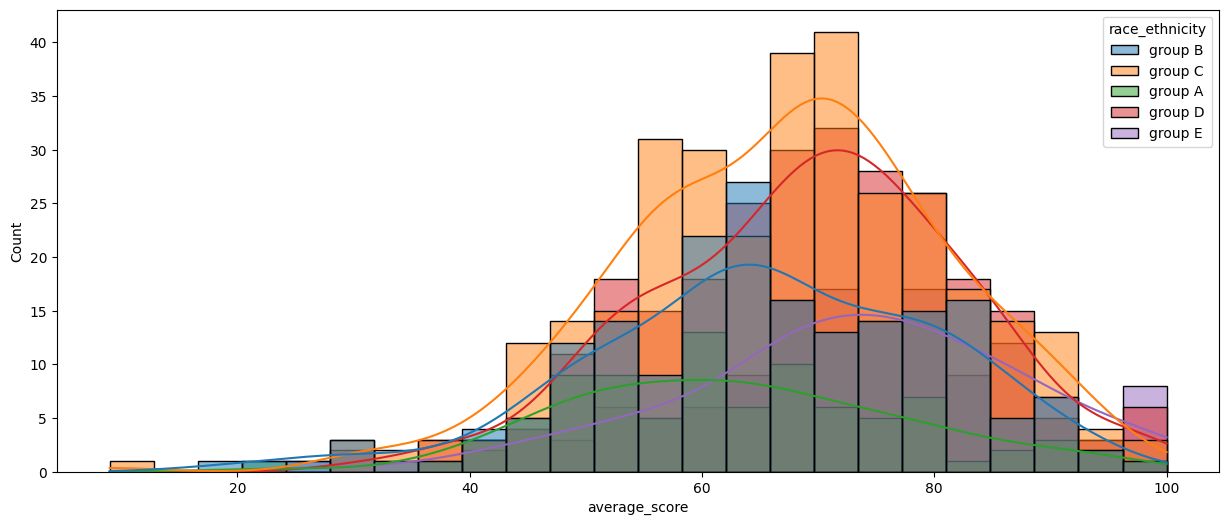

In [25]:
plt.figure(figsize=(15,6))
sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.show()

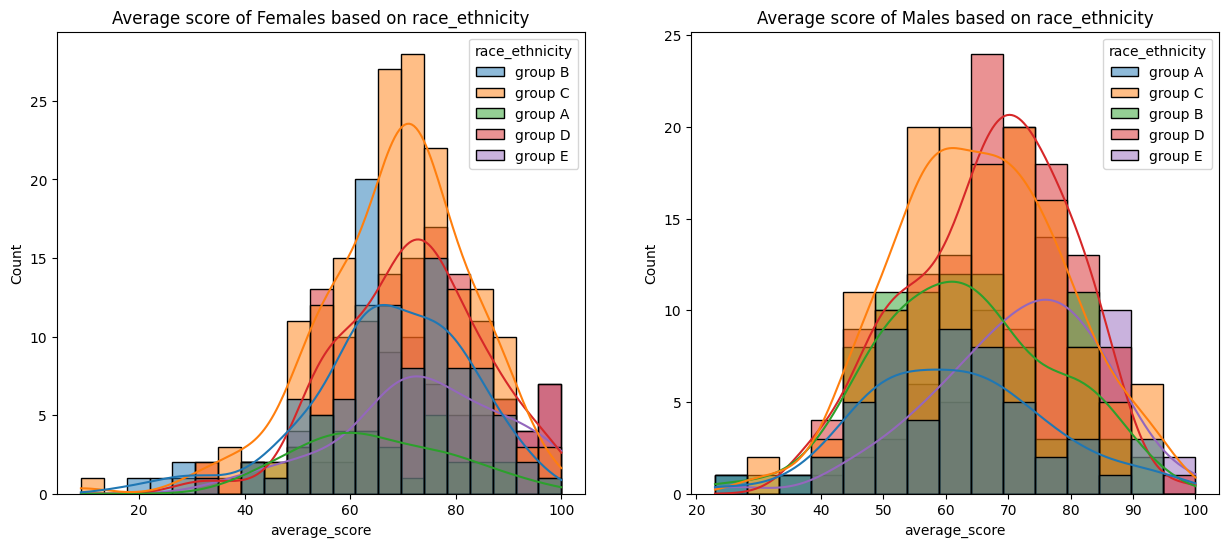

In [26]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.histplot(data=df[df['gender']=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.title('Average score of Females based on race_ethnicity')
plt.subplot(122)
sns.histplot(data=df[df['gender']=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.title('Average score of Males based on race_ethnicity')
plt.show()

#### `INSIGHTS`
- Average score of group A nd group B are less compared to other groups.
- In female students average scores of group A studnets are lowest.
- For males the average score of males lower in group A, B and C.

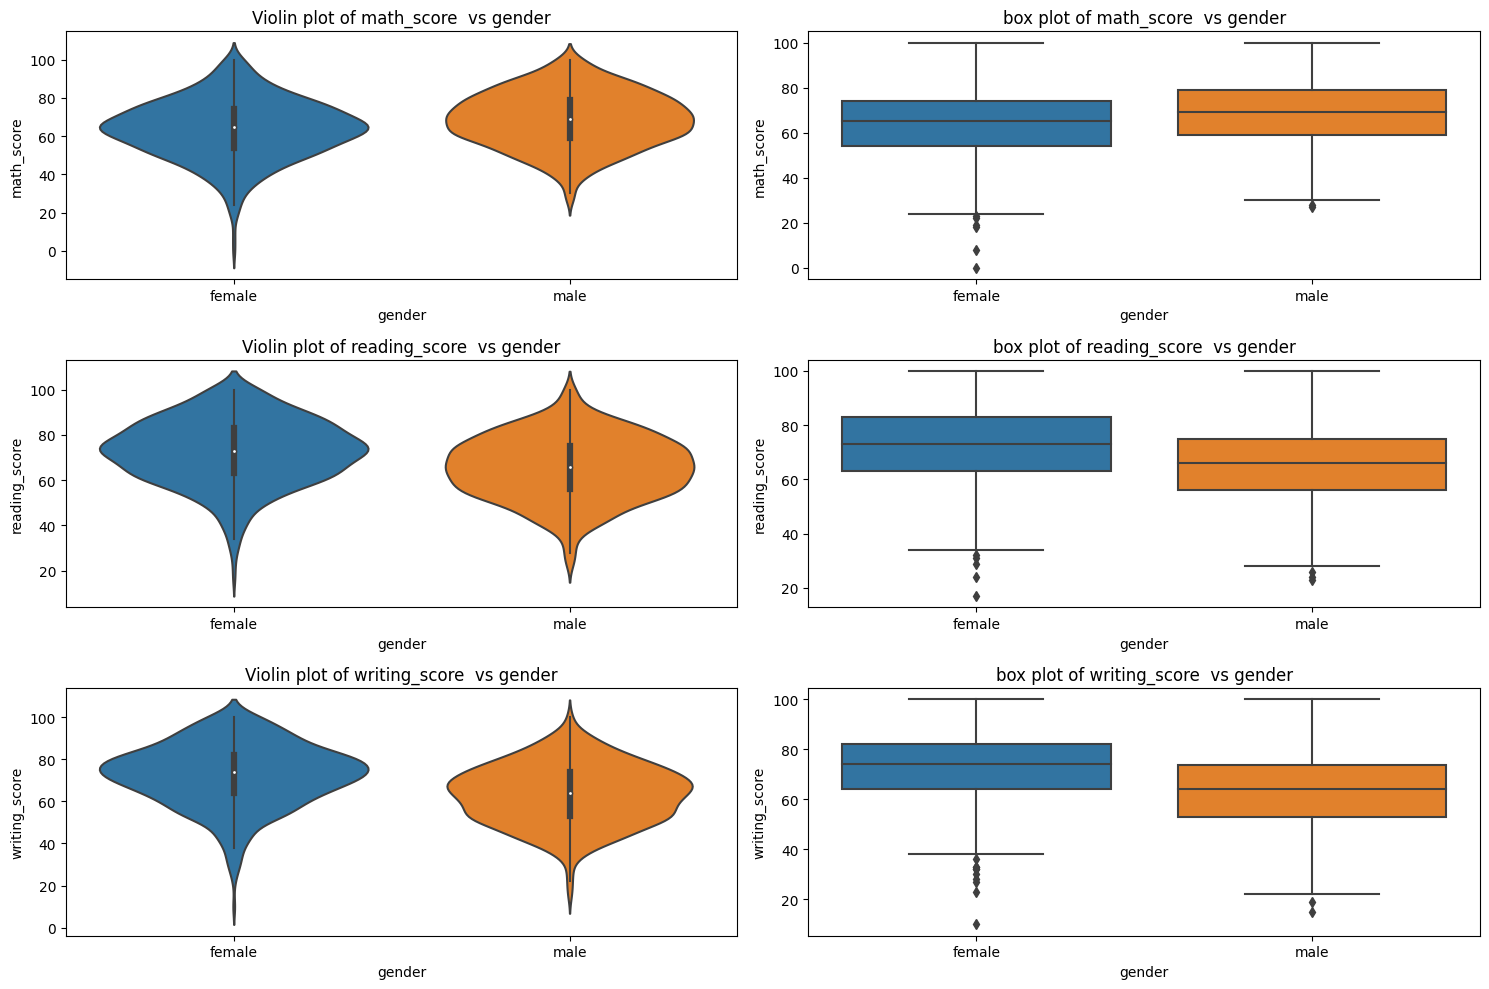

In [27]:
plt.figure(figsize=(15,10))
j=1
for i in ['math_score','reading_score','writing_score']:
    plt.subplot(3,2,j)
    sns.violinplot(data=df,y=i,x='gender')
    plt.title(f'Violin plot of {i}  vs gender')
    plt.subplot(3,2,j+1)
    sns.boxplot(data=df,y=i,x='gender')
    plt.title(f'box plot of {i}  vs gender')
    j+=2
plt.tight_layout()
plt.show()


#### `INSIGHTS`
- Male tends to scoreslight higher in maths where as females tends to score better in reading and writing.
- Scores in reading and writing are better comapred to maths.

### 4.2 MULTIVARIATE ANALYSIS USING PIEPLOT

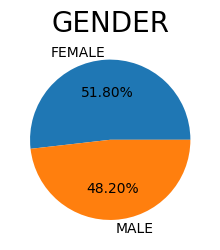

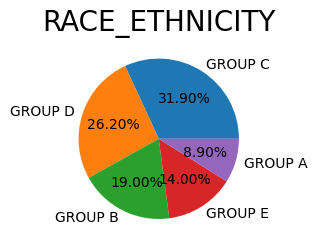

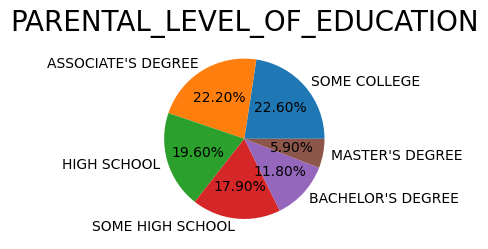

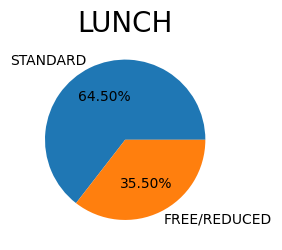

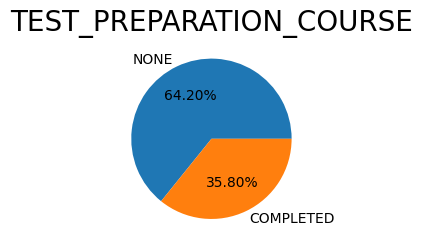

In [70]:

for j in cat_features:
    k=1
    labels=[i.upper() for i in list(df[j].value_counts().index)]
    size=df[j].value_counts()
    plt.figure(figsize=(15,6))
    plt.subplot(1,5,k)
    plt.pie(size,labels=labels,autopct='%.2f%%')
    plt.title(j.upper(), fontsize = 20)
    plt.axis('off')
    k=k+1
   

#### `INSIGHTS`
- The number of male and female students are slamost equal.
- Highest number of race_ethnicity group are group C and group D.
- Around 60% of the parents have college,associate or high school degree.
- More than 60% of the student took the standard lunch.
- Round 65% students didnot took any test preparation course.

#### MULTIVARIATE ANALYSIS BASED ON GENDER

- `Does the score depends upon gender of the student?`

In [63]:
req_features=[i for i in df.columns.values if df[i].dtype!='O']

In [64]:
req_features.append('gender')

In [72]:
grouped_mean=df[req_features].groupby(by='gender').mean()
grouped_mean

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


<Axes: xlabel='gender'>

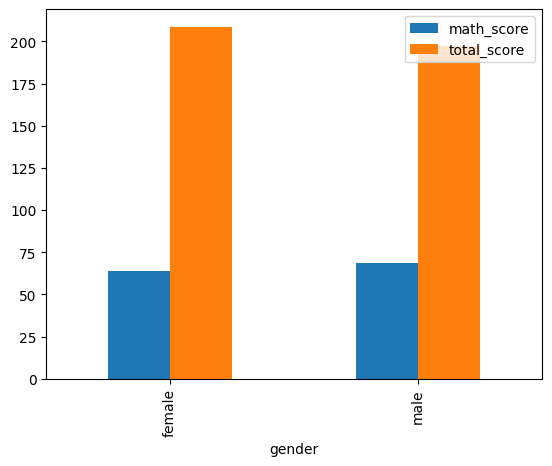

In [80]:
grouped_mean[['math_score','total_score']].plot(kind='bar')

`INSIGHTS`
- On an average females have better score than males.
- Males generally better performs in maths.

#### MULTIVARIATE ANALYSIS BASED ON RACE AND ETHNICICTY
- `Does race_ethnicity have any impact on the score ?`

In [85]:
req_features=[i for i in df.columns.values if df[i].dtype!='O']
req_features.append('race_ethnicity')


In [87]:
grouped_mean=df[req_features].groupby(by='race_ethnicity').mean()
grouped_mean

,math_score,reading_score,writing_score,total_score,average_score
race_ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


<Axes: xlabel='race_ethnicity'>

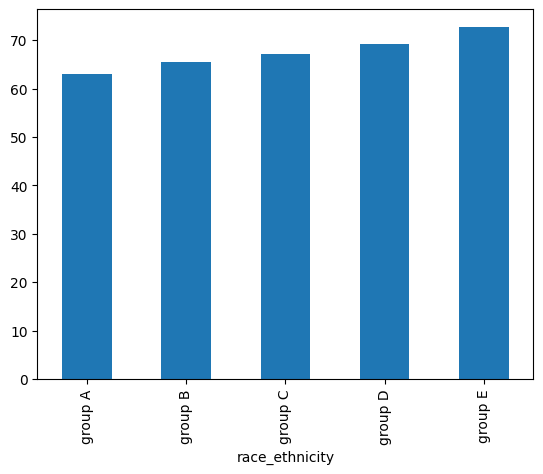

In [90]:
grouped_mean['average_score'].plot(kind='bar')

`INSIGHTS`
- Group D and E have higher totl average score than other groups while group A has much lower score.
- Group D and E have higher average score in all the subject while group A have much lower score.

#### MULTIVARIATE ANALYSIS BASED ON PARENTAL LEVEL OF EDUCATION

In [93]:
req_features=[i for i in df.columns.values if df[i].dtype!='O']
req_features.append('parental_level_of_education')

In [94]:
grouped_mean=df[req_features].groupby(by='parental_level_of_education').mean()
grouped_mean

,math_score,reading_score,writing_score,total_score,average_score
parental_level_of_education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
high school,62.137755,64.704082,62.448980,189.290816,63.096939
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
some college,67.128319,69.460177,68.840708,205.429204,68.476401
some high school,63.497207,66.938547,64.888268,195.324022,65.108007


<Axes: xlabel='parental_level_of_education'>

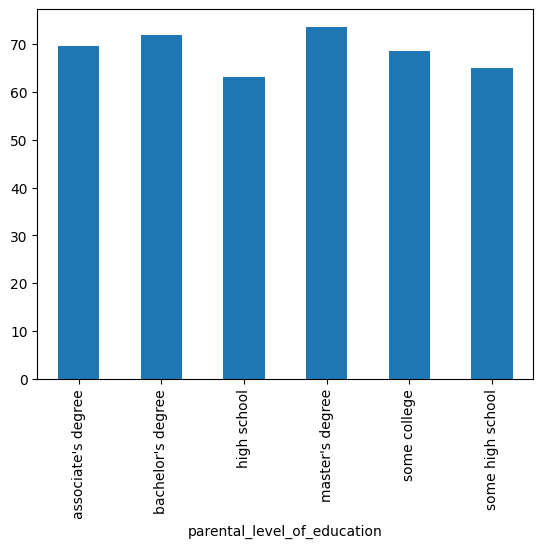

In [95]:
grouped_mean['average_score'].plot(kind='bar')

`INSIGHT`
- Parental level of education have an impact on students score.
- Parents having masters or bachelor's level of education have higher score compared to other level of education.

#### MULTIVARIATE ANALYSIS BASED ON LUNCH PROVIDED

In [98]:
req_features=[i for i in df.columns.values if df[i].dtype!='O']
req_features.append('lunch')

In [99]:
grouped_mean=df[req_features].groupby(by='lunch').mean()
grouped_mean

,math_score,reading_score,writing_score,total_score,average_score
lunch,,,,,
free/reduced,58.921127,64.653521,63.022535,186.597183,62.199061
standard,70.034109,71.654264,70.823256,212.511628,70.837209


<Axes: xlabel='lunch'>

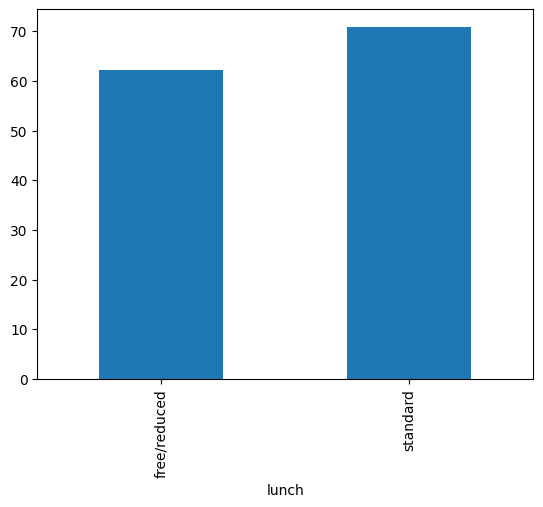

In [100]:
grouped_mean['average_score'].plot(kind='bar')

`INSIGHTS`
- The students with standard lunch tends to score higher compared to student with free/reduced lunch.

#### MULTIVARIATE ANALYSIS BASED ON TEST PREPARATION COURSE

In [105]:
req_features=[i for i in df.columns.values if df[i].dtype!='O']
req_features.append('test_preparation_course')

In [106]:
grouped_mean=df[req_features].groupby(by='test_preparation_course').mean()
grouped_mean

,math_score,reading_score,writing_score,total_score,average_score
test_preparation_course,,,,,
completed,69.695531,73.893855,74.418994,218.008380,72.669460
none,64.077882,66.534268,64.504673,195.116822,65.038941


`INSIGHTS`
- Test preparation course have a significant impact on the performance of the students.

In [112]:
pd.crosstab(df['gender'],df['race_ethnicity'])

race_ethnicity,group A,group B,group C,group D,group E
gender,,,,,
female,36,104,180,129,69
male,53,86,139,133,71


In [132]:
course_education=pd.crosstab(df['test_preparation_course'],df['parental_level_of_education'])
course_education.loc['percentage']=(course_education.loc['none']-course_education.loc['completed'])*100/(course_education.loc['completed'])

In [133]:
course_education

parental_level_of_education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
test_preparation_course,,,,,,
completed,82.000000,46.000000,56.0,20.0,77.000000,77.000000
none,140.000000,72.000000,140.0,39.0,149.000000,102.000000
percentage,70.731707,56.521739,150.0,95.0,93.506494,32.467532


`INSIGHT`
-  There no clearcut understanding of conclusion that more educated parents prefer or donot prefer courses.